<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%209.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20Transformers/%D0%A2%D0%B5%D0%BC%D0%B0_9_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Transformers_(%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 9. Прогнозирование временных рядов с помощью Transformers (Примеры)

**1 Введение**

С постоянным ростом вычислительной мощности компьютеров и объема хранимых данных нейросетевые модели глубокого обучения успешно применяются в различных областях, таких как компьютерное зрение, обработка естественного языка, распознавание речи, игры и робототехника. Известными примерами являются AlphaGo, разработанный DeepMind Technologies, первая программа, победившая чемпиона мира в игре Го в 2016 году, и ChatGPT от OpenAI, ставший интернет-сенсацией после выпуска в конце 2022 года. Этот чатбот способен генерировать ответы, напоминающие человеческие, в различных ситуациях, будь то написание статей, ответы на вопросы или создание кода по запросу.

Анализ временных рядов имеет широкий спектр применений в таких областях, как инженерия, экономика, метеорология и финансы. Особое внимание уделяется прогнозированию временных рядов, являющемуся одной из самых сложных задач в инвестициях. Благодаря быстрому росту финансовых данных, мы наблюдаем значительный рост исследований по прогнозированию финансовых показателей, таких как макроэкономические показатели, цены на активы, доходность активов, а также индикаторы риска, включая реализованную и предполагаемую волатильность.

Традиционные статистические модели для моделирования временных рядов можно разделить на две категории: линейные модели временных рядов, такие как модели ARIMA, и нелинейные модели временных рядов, например, модели GARCH. В последние годы модели машинного обучения показали много потенциала для улучшения нашего понимания финансовых рынков.

Развитие глубокого обучения предоставило мощные инструменты для создания нового поколения моделей прогнозирования временных рядов. Глубокие искусственные нейронные сети, способные на обучение временным динамикам полностью на основе данных, особенно хорошо адаптированы к задаче поиска сложных нелинейных связей между входами и выходами. Изначально модель Transformer была разработана и представлена компанией Google в 2017 году (Vaswani et al., 2017). Она призвана обрабатывать последовательные данные с использованием механизмов внимания, что позволяет решать задачи обучения на последовательностях в контексте обработки естественного языка, таких как машинный перевод. Сущность модели Transformer заключается в её способности преобразовывать входную последовательность из одной области в выходную последовательность из другой. Аналогично, если рассматривать один отрезок временного ряда как предложение на одном языке, а следующий отрезок как предложение на другом языке, то задача прогнозирования многократных шагов во временных рядах становится задачей обучения на последовательностях. Именно поэтому модель Transformer представляет интерес для решения задач прогнозирования в анализе временных рядов.


В рамках данной лекции мы обсуждаем два конкретных финансовых приложения модели Transformer. Первое приложение касается создания стратегий следования за трендами. Здесь мы используем кодировщик модели Transformer для построения модели бинарной классификации, предсказывающей направление будущих доходов активов. Второе приложение рассматривает задачу многоуровневой оптимизации портфеля с акцентом на прогнозирование волатильности. Кроме того, в нашей лекции мы обсуждаем вызовы и соображения, связанные с применением моделей машинного обучения в финансовой сфере.

Таким образом, наша лекция охватывает не только теоретические основы и принципы работы модели Transformer в контексте временных рядов, но и её практические применения в современной финансовой аналитике.



### 2. Многошаговое прогнозирование временных рядов

#### 2.1 Проблемы обучения на последовательностях

Последовательностью мы обычно называем набор символов одного типа, расположенных в определённом порядке. Это могут быть числа, буквы, слова, а также события или объекты. Например, порядок, в котором мы посещаем веб-страницы, также является последовательностью. В задачах обучения на последовательностях можно выделить по меньшей мере три основные категории:

1. **Прогнозирование последовательностей**  
   Целью является предсказание категориальной метки или непрерывного значения. Например, для финансового временного ряда часто необходимо предсказать следующее значение в самой последовательности, что и называется прогнозированием временных рядов.

2. **Генерация последовательностей**  
   Целью является преобразование последовательностей из одной области в последовательности другой области. К таким задачам относятся машинный перевод, суммаризация текстов, чат-боты и т.д.

3. **Последовательное принятие решений**  
   Целью является принятие различных решений в последовательном порядке для оптимизации всего процесса, например, оптимальная игра в карточную игру.

Важно отметить, что границы между этими категориями не являются строгими, то есть одна и та же задача может быть отнесена к разным категориям. Например, чат-боты можно отнести как к задачам генерации последовательностей, так и к задачам последовательного принятия решений, поскольку бот должен не только генерировать подходящие ответы на вопросы, но и учитывать контекст, чтобы дать лучший ответ.

## Традиционные методы многошагового прогнозирования временных рядов

### Введение

В экономике и финансах временные ряды, представляющие собой последовательности чисел, упорядоченных во времени, являются основным объектом исследования. Мы занимаемся прогнозированием таких последовательностей, как национальный ВВП, доходность финансовых рынков, волатильность и прочее. Традиционно для моделирования временных рядов использовались статистические модели, такие как авторегрессионная интегрированная скользящая средняя (ARIMA) и обобщенная авторегрессионная условная гетероскедастичность (GARCH). Однако с развитием вычислительных мощностей и популяризацией машинного обучения, особенно глубокого обучения, все чаще применяются модели машинного обучения, такие как рекуррентные нейронные сети (RNN), долгосрочная краткосрочная память (LSTM) и модели с управляемыми рекуррентными блоками (GRU).

### Постановка задачи

Пусть $ X_{1}^{_t} = \{x_1, x_2, \ldots, x_t\} $ — временной ряд из $ t $ прошедших значений динамической системы, где каждое $ x_i $ — это $ d $-мерный вектор, то есть $ x_i = (x_{i}^{1}, x_{i}^{2}, \ldots, x_{i}^{d}) $. Задача прогнозирования временных рядов на момент времени $ t $ заключается в предсказании значений $ X_{t+1}^{t+\tau} = \{x_{t+1}, x_{t+2}, \ldots, x_{t+\tau}\} $ на $ \tau $ шагов вперед.

- Если $ d = 1 $, то это задача одномерного прогнозирования временного ряда.
- Если $ d > 1 $, то это задача многомерного прогнозирования.
- Если $ \tau > 1 $, то это задача многошагового прогнозирования временных рядов.

Существует два подхода к моделированию многошагового прогнозирования:

#### Итеративное многошаговое прогнозирование

В данном случае наша цель — построить одношаговую модель прогнозирования $ f $, которая моделирует связь между прошлыми значениями $ X_{1}^{_t} = \{x_1, x_2, \ldots, x_t\} $ и следующим значением $ x_{t+1} $ динамической системы:

$$ x_{t+1} = f(X_{1}^{_t}) + \epsilon $$

где $ \epsilon $ — это ошибка модели, часто называемая шумом. В процессе прогнозирования мы итеративно применяем эту модель для получения многошаговых предсказаний, как показано на Рисунке 1:

$$ \hat{x}_{t+1} = f(x_1, x_2, \ldots, x_t) $$
$$ \hat{x}_{t+2} = f(x_2, x_3, \ldots, \hat{x}_{t+1}) $$
$$ \hat{x}_{t+3} = f(x_3, x_4, \ldots, \hat{x}_{t+2}) $$
$$ \vdots $$

Таким образом, нам нужно построить всего одну модель $ f $ для многошагового прогнозирования, но ошибка будет накапливаться, поскольку предсказание на момент $ t+1 $ используется как вход для следующего временного шага.


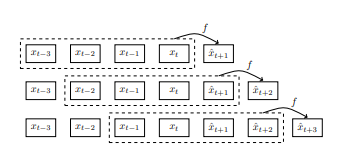


#### Прямое многошаговое прогнозирование

В альтернативном подходе мы строим серию моделей $ g_i $ для $ i = 1, 2, \ldots, \tau $, каждая из которых моделирует связь между прошлыми значениями $ X_{1}^{_t} = \{x_1, x_2, \ldots, x_t\} $ и одним будущим значением динамической системы:

$$ x_{t+i} = g_i(X_{1}^{_t}) + \epsilon_i $$
т.е.
$$ x_{t+1} = g_1(X_{1}^{_t}) + \epsilon_1 $$
$$ x_{t+2} = g_2(X_{1}^{_t}) + \epsilon_2 $$
$$ \vdots $$
$$ x_{t+\tau} = g_{\tau }(X_{1}^{_t}) + \epsilon_\tau $$



где $ \epsilon_i $ — это серия ошибок модели. Кроме того, учитывая, что нейронные сети поддерживают множественные выходы, мы можем заменить все отдельные модели $ g_i $ одной моделью $ g $ с большим количеством параметров, которая может предсказывать все $ \tau $ будущих значений одновременно:

$$ X_{t+1}^{t+\tau} = g(X_{1}^{_t}) + \epsilon $$

Процесс прогнозирования показан на Рисунке 2. В этом случае мы напрямую предсказываем значения нескольких временных шагов, не накапливая ошибок, но не моделируем связь между $ x_{t+1}, x_{t+2}, \ldots, x_{t+\tau} $. Кроме того, этот подход требует обучения большего числа моделей или модели с большим количеством параметров.


##Seq2seq модели


Как было упомянуто в предыдущем разделе, в последние годы все больше моделей глубокого обучения используется для обработки последовательных данных. Наиболее известные из них — это рекуррентные нейронные сети (RNN) и модели с долгосрочной краткосрочной памятью (LSTM).


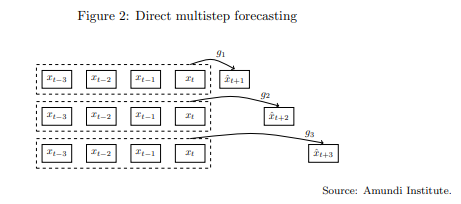



#### Проблемы классических моделей RNN и LSTM

Структура классических моделей RNN или LSTM недостаточно гибка и не может моделировать очень сложные зависимости в последовательных данных. В некоторых задачах обработки естественного языка (NLP), таких как машинный перевод, распознавание речи, суммирование текста и системы вопросов и ответов, длины входных и выходных последовательностей часто не совпадают. В таких случаях требуется другая структура нейронных сетей — модель "последовательность в последовательность" (seq2seq), которая эффективно решает эти проблемы.

### Модель последовательность в последовательность (seq2seq)

Модели seq2seq предназначены для преобразования последовательностей из одной области в последовательности другой области. Как показано на Рисунке 3, модель seq2seq, которую можно рассматривать как специальный тип структуры "многие ко многим", обычно имеет структуру энкодера-декодера:

#### Энкодер

Энкодер преобразует входную последовательность в вектор фиксированной длины, называемый контекстным вектором. Этот контекстный вектор содержит всю информацию, которую энкодер может извлечь из входных данных, включая связи между различными временными шагами и слоями сети.

#### Декодер

Декодер преобразует контекстный вектор в выходную последовательность. В зависимости от целей и различных способов обучения декодер может иметь входные данные или работать без них.


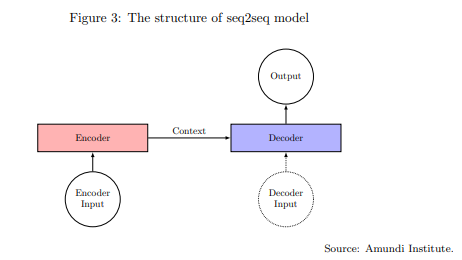


### Применение seq2seq моделей к задачам прогнозирования временных рядов

С увеличением вычислительной мощности с 2000 года все больше моделей глубокого обучения используется для решения задач прогнозирования временных рядов, так как эти задачи могут рассматриваться как задачи "последовательность в последовательность", особенно в случае многошагового прогнозирования временных рядов. На практике энкодер и декодер могут состоять из одного или нескольких слоев RNN и LSTM.

Энкодер преобразует входную последовательность $ \{x_1, \ldots, x_t\} $ в $ d' $-мерный контекстный вектор $ z = (z_1, \ldots, z_{d'}) $, а декодер преобразует эту последовательность контекста в выходную последовательность $ y_{t+1}, \ldots, y_{t+\tau} $.

### Методы многошагового прогнозирования с использованием структуры энкодер-декодер

#### Прямое многошаговое прогнозирование

Как показано на Рисунке 4a, простая структура энкодер-декодер соответствует прямому многошаговому прогнозированию, как на Рисунке 2. В этой структуре контекстный вектор $ z $ общий для всех выходов $ \{y_{t+1}, \ldots, y_{t+\tau}\} $, и декодер не имеет других входных данных.

#### Итеративное многошаговое прогнозирование

На Рисунке 4b показана рекурсивная структура энкодер-декодер, которая аналогична итеративному многошаговому прогнозированию. Контекстный вектор $ z $ используется только в качестве входных данных для декодера $ t+1 $ для предсказания первого выхода $ y_{t+1} $, затем $ z $ может быть обновлен перед передачей декодеру $ t+2 $. В этой структуре у декодера могут быть входные данные. Если мы не используем истинные метки в качестве входных данных для декодера во время обучения, это называется техникой "свободного выполнения" (free running). Если мы используем их как правильный ответ, подход называется техникой "принудительного обучения" (teacher forcing). Подробные технические детали о техниках "свободного выполнения" и "принудительного обучения" можно найти в Приложении B.3.


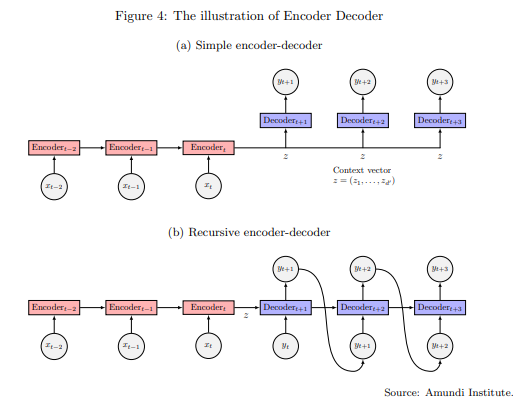



Таким образом, использование структуры энкодер-декодер с техникой принудительного обучения подходит для задач многошагового прогнозирования временных рядов. В этом случае мы можем моделировать зависимость между предсказаниями, одновременно уменьшая накопление ошибок прогноза.


##Модель Transformer

### Введение

Во многих задачах обучения последовательностям, таких как машинный перевод, понимание контекста имеет решающее значение. Как показано в Примере 1, слово "it" в зависимости от контекста относится к разным вещам в двух похожих предложениях. В первом предложении слово "it" относится к собаке, а во втором — к кости.

**Пример 1:**
- Собака не съела кость, потому что она не была голодна.
- Собака не съела кость, потому что она плохо пахла.

Иногда важная информация появляется в начале последовательности, что затрудняет её захват моделью, особенно в задачах прогнозирования последовательностей. Чтобы решить эту проблему, Google представил модель Transformer в работе Vaswani et al. (2017), которая является эволюцией модели seq2seq. Модели Transformer разработаны для использования механизмов внимания/самовнимания, чтобы захватывать паттерны и долгосрочную память в данных, такие как зависимости между словами в абзаце или контекстная информация в статье.

#### Отличие механизма внимания от традиционных RNN и LSTM

Основное отличие механизма внимания от традиционных моделей RNN или LSTM заключается в том, что механизм внимания фокусируется непосредственно на определенных частях последовательности, а не обрабатывает их равномерно по порядку, что позволяет модели захватывать информацию на самых ранних позициях в последовательности. В результате механизм внимания помогает модели лучше понимать контекст последовательности.

#### Применение в финансовом рынке

Аналогично, контекст также очень важен на финансовом рынке, такие как серийная корреляция, кластеризация волатильности, смена режимов и значимые финансовые события. Это и есть движущая сила нашего стремления применить модель Transformer для задач прогнозирования временных рядов в управлении портфелем. В этом разделе мы рассмотрим различные части модели Transformer, их использование и преимущества, а в следующем разделе покажем, что использование моделей Transformer может предоставить вычислительные преимущества в некоторых приложениях количественных инвестиций.

### 1.1 Механизм внимания

Когда мы смотрим на картину, нас привлекают определенные заметные части изображения, а другие мы игнорируем, что означает, что наше внимание не равномерно распределяется по всем областям картины. Как показано на Рисунке 5, при первом взгляде на картину мы больше сосредотачиваемся на собаках и кошках, чем на деревьях и горках, и, в частности, большинство людей полностью игнорируют самолет в небе. Математически говоря, мы придаем разный вес различным областям картины: области с высокими весами будут производить более интенсивные сигналы, которые будут восприняты мозгом через глаза. Таким образом, механизм внимания фактически является системой распределения весов. На практике мы хотим имитировать этот механизм внимания нашего мозга в глубоких нейронных сетях, чтобы модель могла уделять больше внимания важным частям входных данных в зависимости от контекста.




### 1.1.1 Запросы, ключи и значения

Vaswani et al. (2017) ввели механизм внимания, называемый масштабированным скалярным вниманием (scaled dot-product attention), в своих моделях Transformer. В своей работе авторы использовали концепцию запросов (Q), ключей (K) и значений (V), часто встречающуюся в системах информационного поиска: имея запрос, мы вычисляем его релевантность ключу и затем находим наиболее подходящее значение на основе этой релевантности. Например, когда мы делаем покупки онлайн на платформе электронной коммерции, мы вводим наши предпочтения, такие как бренд, цена, характеристики, в поисковую систему. Сайт сопоставляет наши предпочтения с основной информацией о всех доступных продуктах и возвращает те, которые наилучшим образом соответствуют нашим предпочтениям. В этом примере запросом являются наши предпочтения, ключом — основная информация о каждом продукте, а значением — сам продукт.

Аналогично, механизм внимания в моделях Transformer использует скалярное произведение для вычисления сходства между запросом и ключом, и использует функцию softmax для определения весов каждого элемента значений. Более высокие веса присваиваются тем элементам, ключи которых более релевантны запросу.


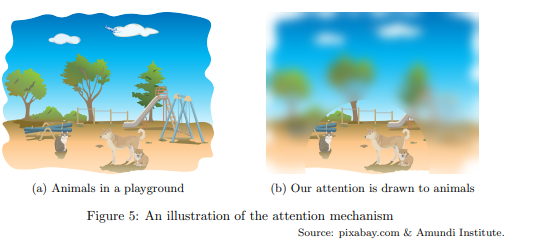


Скалярное произведение — это простой способ измерить релевантность запроса к ключу, но эта операция требует, чтобы у запроса и ключа были одинаковые размеры. Обозначим через $d_k$ размерность запроса и ключа, а через $d_v$ — размерность значения. Формально, вектор внимания для $n$ запросов $Q$ и $m$ пар ключ-значение $(K, V)$ вычисляется следующим образом:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{Q K^T}{\sqrt{d_k}}\right) V
$$

где $Q \in \mathbb{R}^{n \times d_k}$, $K \in \mathbb{R}^{m \times d_k}$, $V \in \mathbb{R}^{m \times d_v}$. Скалярные произведения $Q K^T$ масштабируются на $\sqrt{d_k}$, что объясняет название "масштабированное скалярное внимание" для этого уравнения.

### Мотивация масштабирования скалярного произведения

Предположим, что $Q$ и $K$ имеют среднее значение 0 и дисперсию 1 в каждом измерении. В этом случае матричное умножение $Q K^T$ будет иметь среднее значение 0 и дисперсию $d_k$ в каждом измерении. Таким образом, квадратный корень из $d_k$ используется для того, чтобы дисперсия $Q K^T$ была масштабирована до единицы, независимо от значения $d_k$. Консистентная дисперсия матричного умножения облегчает процесс обучения моделей машинного обучения.

### Внимание как ядровая функция

Кроме того, скалярное произведение между запросами $Q$ и ключами $K$, которое определяет вектор внимания, является типом ядровой функции. Как объяснено в работе Tsai et al. (2019), мы можем переписать уравнение через призму ядерной функции. Для $i$-й строки внимания:

$$
\text{Attention}(Q, K, V)_i = \sum_{j=1}^{m} \frac{\exp\left(\frac{Q_i K_j^T}{\sqrt{d_k}}\right)}{\sum_{k=1}^{m} \exp\left(\frac{Q_i K_k^T}{\sqrt{d_k}}\right)} V_j = \mathbb{E}_{P(K_j | Q_i)}(V_j)
$$

где $P(K_j | Q_i)$ — это условная вероятность, определяемая ядровой функцией. Tsai et al. (2019) демонстрируют, как эти ядровые функции помогают понять механизм внимания модели Transformer в едином виде. Различные выборы ядровых функций подразумевают различные архитектуры Transformers.

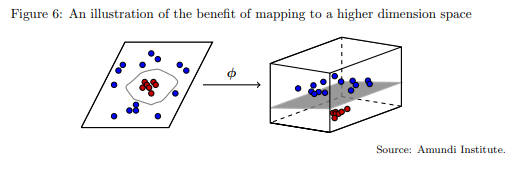



### Пример 2. Ядровая функция для полиномиального отображения 2-го порядка

Для упрощения расчетов, можно определить ядровую функцию $K(x, y) = (x^T y)^2$, что позволяет обойтись без вычисления координат данных в более высоком пространстве измерений, применяя так называемый "kernel trick".

Таким образом, уравнение (3) представляет собой класс линейных сглаживателей с ядерным сглаживанием. В случае неотрицательной ядровой функции, вектор внимания является взвешенным средним всех значений $V$, что можно переписать в виде ожидаемого значения:

$$
\text{Attention}(Q, K, V)_i = \mathbb{E}_{P(K_j | Q_i)}(V_j)
$$

где $P(K_j | Q_i) = \frac{K(Q_i, K_j)}{\sum_{k=1}^{m} K(Q_i, K_k)}$ — условная вероятность, определяемая ядровой функцией $K(\cdot, \cdot)$. Tsai et al. (2019) показывают, как эти ядровые функции помогают понять механизм внимания модели Transformer в унифицированной форме. Разные варианты ядровых функций приводят к различным архитектурам моделей Transformers.


Для иллюстрации рассмотрим следующий числовой пример.

#### Пример 1: Онлайн-покупки

Предположим, что у нас есть запрос на платформе электронной коммерции: мы вводим наши предпочтения, такие как бренд, цена, характеристики, в поисковую систему. Допустим, наш запрос $Q$ представляет собой вектор $[0.2, 0.4, 0.4]$, а ключи $K$ и значения $V$ для трех продуктов представлены в виде следующих матриц:

$$
K = \begin{bmatrix}
0.1 & 0.2 & 0.7 \\
0.4 & 0.4 & 0.2 \\
0.6 & 0.1 & 0.3
\end{bmatrix}, \quad V = \begin{bmatrix}
100 \\
200 \\
300
\end{bmatrix}
$$

Сначала мы вычислим скалярное произведение между запросом и ключами, а затем применим softmax функцию.

$$
QK^T = \begin{bmatrix}
0.2 & 0.4 & 0.4
\end{bmatrix} \begin{bmatrix}
0.1 & 0.4 & 0.6 \\
0.2 & 0.4 & 0.1 \\
0.7 & 0.2 & 0.3
\end{bmatrix} = \begin{bmatrix}
0.41 & 0.28 & 0.23
\end{bmatrix}
$$

Применим масштабирование на $\sqrt{d_k}$ и softmax функцию (предположим, что $d_k = 3$):

$$
\text{Scaled } QK^T = \frac{1}{\sqrt{3}} \begin{bmatrix}
0.41 & 0.28 & 0.23
\end{bmatrix} \approx \begin{bmatrix}
0.237 & 0.162 & 0.133
\end{bmatrix}
$$

$$
\text{softmax}\left(\begin{bmatrix}
0.237 & 0.162 & 0.133
\end{bmatrix}\right) = \begin{bmatrix}
0.355 & 0.327 & 0.318
\end{bmatrix}
$$

Теперь определим веса для значений $V$:

$$
\text{Attention}(Q, K, V) = \begin{bmatrix}
0.355 & 0.327 & 0.318
\end{bmatrix} \begin{bmatrix}
100 \\
200 \\
300
\end{bmatrix} = 0.355 \cdot 100 + 0.327 \cdot 200 + 0.318 \cdot 300 = 224.4
$$

Таким образом, наиболее подходящее значение на основе данного запроса и ключей составляет 224.4.

#### Пример 2: Ядровая функция для полиномиального отображения 2-го порядка

Для иллюстрации использования ядровой функции рассмотрим простой пример с полиномиальным ядром второй степени.

Пусть у нас есть два вектора $x = [1, 2]$ и $y = [3, 4]$. Мы хотим вычислить ядровую функцию $K(x, y) = (x^T y)^2$:

$$
x^T y = 1 \cdot 3 + 2 \cdot 4 = 3 + 8 = 11
$$

$$
K(x, y) = (x^T y)^2 = 11^2 = 121
$$

Таким образом, ядровая функция второго порядка для данных векторов составляет 121. Это демонстрирует, как ядровая функция может быть использована для вычисления сходства между векторами в более высоком пространстве измерений.




### 3.1.2. Самовнимание (Self-attention)

В зависимости от различных определений запросов, ключей и значений существуют различные механизмы внимания. В модели Transformer, представленной Васвани и др. (2017), авторы используют механизм самовнимания (self-attention), что означает, что запросы, ключи и значения берутся из одной и той же последовательности. Пусть у нас есть многомерная последовательность $ X \in \mathbb{R}^{n \times d_{\text{input}}} $, такая как предложение длиной $ n $, преобразованное в представление векторного вложения слова размерности $ d_{\text{input}} $. Обозначим размерность запроса, ключа и значения через $ d_{\text{model}} $, тогда имеем:
$$ Q = X W_Q $$
$$ K = X W_K $$
$$ V = X W_V $$

Где $ W_Q, W_K $ и $ W_V \in \mathbb{R}^{d_{\text{input}} \times d_{\text{model}}} $ — матрицы параметров для обучения, имеющие одинаковую размерность. Таким образом, запросы $ Q $, ключи $ K $ и значения $ V $ представляют собой матрицы $ n \times d_{\text{model}} $.

Механизм самовнимания выражается формулой:
$$ \text{Self-Attention}(X) = \text{softmax} \left( \frac{X W_Q (X W_K)^T}{\sqrt{d_{\text{model}}}} \right) (X W_V) \tag{4} $$

Самовнимание разработано для захвата зависимостей в последовательности, таких как связь каждого слова с другими словами в предложении, что является ключевым аспектом обучения на последовательностях. С помощью нейронных сетей модель изучает распределение внимания каждого элемента относительно других элементов в той же последовательности. Как показано в Примере 1, для слова "it" в первом предложении больший вес внимания должен быть назначен словам "dog" и "hungry", а во втором предложении словам "bone", "smell" и "bad" должны быть даны более высокие веса внимания.

Согласно Васвани и др. (2017), самовнимание обладает несколькими преимуществами, такими как меньшее количество параметров и лучшая способность захватывать долгосрочную память в последовательностях, что является ключевой проблемой для многих задач обучения на последовательностях. В механизме самовнимания элементы в последовательности практически не имеют понятия о порядке, что облегчает модели изучение долгосрочных зависимостей. Модель непосредственно изучает вес внимания элемента относительно всех остальных элементов, даже тех, которые находятся далеко от него.

Конкретные числовые примеры помогут лучше понять, как работает механизм самовнимания в модели Transformer. Давайте рассмотрим следующий пример.

Предположим, у нас есть входная последовательность $ X $ длиной $ n = 4 $ и каждый элемент вложен в пространстве $ d_{\text{input}} = 3 $. Таким образом, $ X $ будет матрицей размера $ 4 \times 3 $:
$$ X = \begin{bmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
1 & 1 & 0 \\
2 & 1 & 3
\end{bmatrix} $$

Для примера, давайте определим, что размерность запроса $ d_{\text{model}} $ и размерность ключа $ d_{\text{model}} $ равны 2. Тогда матрицы параметров $ W_Q, W_K, W_V $ будут размера $ 3 \times 2 $:
$$ W_Q = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
1 & 1
\end{bmatrix}, \quad
W_K = \begin{bmatrix}
0 & 1 \\
1 & 1 \\
0 & 0
\end{bmatrix}, \quad
W_V = \begin{bmatrix}
1 & 2 \\
0 & 1 \\
2 & 3
\end{bmatrix} $$

Теперь вычислим запросы $ Q $, ключи $ K $ и значения $ V $:
$$ Q = X W_Q = \begin{bmatrix}
1 & 0 \\
0 & 2 \\
2 & 3 \\
4 & 5
\end{bmatrix} $$

$$ K = X W_K = \begin{bmatrix}
0 & 1 \\
2 & 2 \\
1 & 1 \\
3 & 4
\end{bmatrix} $$

$$ V = X W_V = \begin{bmatrix}
1 & 2 \\
0 & 2 \\
5 & 9 \\
11 & 16
\end{bmatrix} $$

Теперь применим формулу самовнимания (уравнение (4)) для получения матрицы внимания:
$$ \text{Self-Attention}(X) = \text{softmax} \left( \frac{Q K^T}{\sqrt{d_{\text{model}}}} \right) V $$

$$ Q K^T = \begin{bmatrix}
1 & 0 & 2 & 4 \\
0 & 4 & 2 & 10 \\
2 & 4 & 5 & 14 \\
4 & 8 & 11 & 25
\end{bmatrix} $$

Далее, поделим на $ \sqrt{d_{\text{model}}} = \sqrt{2} $:
$$ \frac{Q K^T}{\sqrt{2}} = \begin{bmatrix}
0.707 & 0 & 1.414 & 2.828 \\
0 & 2.828 & 1.414 & 7.071 \\
1.414 & 2.828 & 3.535 & 9.899 \\
2.828 & 5.657 & 7.778 & 17.678
\end{bmatrix} $$

Применим softmax к каждой строке матрицы $ \frac{Q K^T}{\sqrt{2}} $, чтобы получить матрицу внимания:
$$ \text{softmax} \left( \frac{Q K^T}{\sqrt{2}} \right) = \begin{bmatrix}
0.094 & 0.015 & 0.338 & 0.553 \\
0.002 & 0.966 & 0.031 & 0.001 \\
0.002 & 0.061 & 0.667 & 0.27 \\
0.0 & 0.008 & 0.092 & 0.9
\end{bmatrix} $$

Теперь умножим полученную матрицу на значения $ V $:
$$ \text{Self-Attention}(X) = \begin{bmatrix}
0.094 & 0.015 & 0.338 & 0.553 \\
0.002 & 0.966 & 0.031 & 0.001 \\
0.002 & 0.061 & 0.667 & 0.27 \\
0.0 & 0.008 & 0.092 & 0.9
\end{bmatrix} \begin{bmatrix}
1 & 2 \\
0 & 2 \\
5 & 9 \\
11 & 16
\end{bmatrix} = \begin{bmatrix}
7.232 & 12.256 \\
0.004 & 2.004 \\
3.868 & 7.844 \\
10.108 & 17.888
\end{bmatrix} $$

Этот результат демонстрирует, как механизм самовнимания вычисляет важность каждого элемента $ X $ относительно других элементов, используя запросы, ключи и значения. Полученная матрица $ \text{Self-Attention}(X) $ отражает взвешенные суммы значений $ V $, вычисленные на основе внимания, присвоенного каждому элементу $ X $.


###3.1.3. Концепция многоголового внимания (multi-head attention)
Концепция многоголового внимания (multi-head attention)  представляет собой расширение механизма самовнимания (self-attention), описанного ранее. В самовнимании каждый запрос сравнивается со всеми ключами для получения весов, отражающих важность соответствующих значений. Эти веса используются для вычисления внимательных оценок путем взвешивания и усреднения значений. Основная задача заключается в обучении параметров $ W_Q $, $ W_K $ и $ W_V $ с использованием нейронных сетей. После обучения эти параметры фиксируют связи между запросами, ключами и значениями, определяя матрицу оценок внимания.

Для повышения гибкости модели и способности извлекать информацию из различных аспектов последовательности мы вводим концепцию многоголового внимания. Этот подход включает независимое выполнение процесса масштабированного внимания несколько раз для получения различных матриц оценок внимания, или "голов". Объединение этих голов составляет механизм многоголового внимания.

Пусть $ h $ обозначает количество голов в этом механизме. Для входа $ X $ вычисление для каждой головы $ i $ представлено следующим образом:

$$ Q_i = X W_Q^{(i)}, \quad K_i = X W_K^{(i)}, \quad V_i = X W_V^{(i)} $$

где $ W_Q^{(i)} $, $ W_K^{(i)} $, $ W_V^{(i)} \in \mathbb{R}^{d_{\text{input}} \times d_{\text{head}}} $ являются параметрами матриц, специфичными для каждой головы.

Каждая голова независимо вычисляет свою матрицу оценок внимания:

$$ \text{head}_i = \text{Attention}(Q_i, K_i, V_i) $$

Эти индивидуальные матрицы оценок внимания объединяются в общий выход многоголового внимания:

$$ \text{MultiHead}(X) = \text{Concat}(\text{head}_1, \ldots, \text{head}_h) W_O $$

где $ W_O \in \mathbb{R}^{h \cdot d_{\text{head}} \times d_{\text{model}}} $ — это обучаемая параметрическая матрица для линейного преобразования.

Введение нескольких голов позволяет модели совместно учитывать информацию из различных подпространств представления и позиций внутри последовательности. Эта способность позволяет модели улавливать разнообразные зависимости, от короткосрочных до долгосрочных, улучшая ее способность к обучению сложных функций, выходящих за рамки простых взвешенных средних. Кроме того, механизм многоголового внимания можно рассматривать как метод ансамблевого обучения, снижающий риск переобучения и ускоряющий процесс обучения за счет параллельных вычислений.
Как указано Васвани и др. (2017), многоголовое внимание значительно расширяет возможности модели Transformer в моделировании сложных взаимосвязей в последовательностях, что значительно улучшает ее производительность в различных задачах обучения на последовательностях.

Конкретный числовой пример многоголового внимания в модели Transformer можно продемонстрировать на простом наборе данных. Предположим, у нас есть входной вектор $ X $ размерности $ 1 \times 4 $:

$$ X = [x_1, x_2, x_3, x_4] $$

Допустим, мы хотим использовать многоголовое внимание с тремя головами $ h = 3 $. Каждая голова будет иметь свои матрицы параметров $ W_Q^{(i)}, W_K^{(i)}, W_V^{(i)} $ размерности $ 4 \times 2 $ (для простоты примера):

$$ W_Q^{(1)} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
1 & 1 \\
0 & 0
\end{bmatrix}, \quad
W_K^{(1)} = \begin{bmatrix}
0 & 1 \\
1 & 0 \\
0 & 1 \\
1 & 1
\end{bmatrix}, \quad
W_V^{(1)} = \begin{bmatrix}
1 & 1 \\
0 & 1 \\
1 & 0 \\
0 & 0
\end{bmatrix} $$

$$ W_Q^{(2)} = \begin{bmatrix}
0 & 1 \\
1 & 0 \\
1 & 1 \\
0 & 0
\end{bmatrix}, \quad
W_K^{(2)} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
0 & 1 \\
1 & 1
\end{bmatrix}, \quad
W_V^{(2)} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
1 & 1 \\
0 & 0
\end{bmatrix} $$

$$ W_Q^{(3)} = \begin{bmatrix}
1 & 1 \\
0 & 0 \\
1 & 0 \\
0 & 1
\end{bmatrix}, \quad
W_K^{(3)} = \begin{bmatrix}
1 & 1 \\
0 & 0 \\
1 & 0 \\
0 & 1
\end{bmatrix}, \quad
W_V^{(3)} = \begin{bmatrix}
1 & 1 \\
0 & 0 \\
1 & 0 \\
0 & 1
\end{bmatrix} $$

Для каждой головы вычислим запросы $ Q_i = X W_Q^{(i)}, $ ключи $ K_i = X W_K^{(i)}, $ и значения $ V_i = X W_V^{(i)} $:

Для первой головы:
$$ Q_1 = X W_Q^{(1)} = [x_1 + x_3, x_2 + x_4, x_1 + x_2 + x_3, 0] $$
$$ K_1 = X W_K^{(1)} = [x_2 + x_4, x_1 + x_3, x_2 + x_4, x_1 + x_2 + x_3] $$
$$ V_1 = X W_V^{(1)} = [x_1 + x_2, x_2, x_1 + x_3, 0] $$

Для второй головы:
$$ Q_2 = X W_Q^{(2)} = [x_2 + x_4, x_1 + x_3, x_1 + x_2 + x_3, 0] $$
$$ K_2 = X W_K^{(2)} = [x_1 + x_3, x_2 + x_4, x_2 + x_4, x_1 + x_2 + x_3] $$
$$ V_2 = X W_V^{(2)} = [x_1, x_2 + x_4, x_1 + x_2 + x_3, 0] $$

Для третьей головы:
$$ Q_3 = X W_Q^{(3)} = [x_1 + x_2, 0, x_1 + x_3, x_2 + x_4] $$
$$ K_3 = X W_K^{(3)} = [x_1 + x_2, 0, x_1 + x_3, x_2 + x_4] $$
$$ V_3 = X W_V^{(3)} = [x_1 + x_2, 0, x_1 + x_3, x_2 + x_4] $$

Затем для каждой головы вычисляется внимание $ \text{head}_i = \text{softmax}(Q_i K_i^T / \sqrt{2}) V_i $, где $ \sqrt{2} $ — это корень из размерности головы $ d_{\text{head}} = 2 $.

В конце концов, результаты всех голов объединяются и умножаются на матрицу $ W_O $ для получения итогового выхода многоголового внимания.

Этот пример показывает, как модель Transformer использует многоголовое внимание для обработки входных данных и выявления различных аспектов зависимостей в последовательности.


### **3.1.4 Позиционное кодирование**

Как уже упоминалось в разделах 3.1.2 и 3.1.3, механизмы само-внимания (self-attention) и многоголовое внимание (multi-head attention) перестановочно-эквивариантны по отношению к своим входам. Это означает, что результат работы модели не изменится при изменении порядка элементов в последовательности, благодаря использованию операций скалярного произведения в механизме внимания. Следовательно, каждый элемент в последовательности рассматривается как равноудалённый от всех остальных элементов, что упрощает моделирование долгосрочных зависимостей. Однако в некоторых задачах обучения на последовательностях, таких как машинный перевод, полное игнорирование информации о позиции элементов не является оптимальным подходом. Для решения этой проблемы вводится позиционное кодирование для дополнения входных признаков.

Представление расширенной последовательности $ \tilde{X} $ включает позиционное кодирование $ PE $ следующим образом:

$$ \tilde{X} = X + PE $$

Существует несколько методов позиционного кодирования, и хотя нет чёткого лидера среди них, существуют определённые критерии, которым они должны соответствовать. Например, позиционные вложения должны отражать позиционные отношения между элементами последовательности, и их значения не должны быть слишком большими по сравнению с входными признаками, а также они должны оставаться детерминированными. В своей работе Vaswani et al. (2017) предложили схему позиционного кодирования с использованием синусоидальных и косинусоидальных функций различной частоты:

$$ PE_{(pos, 2i)} = \sin \left( \frac{pos}{10000^{2i / d_{\text{model}}}} \right) $$
$$ PE_{(pos, 2i+1)} = \cos \left( \frac{pos}{10000^{2i / d_{\text{model}}}} \right) $$

где $ pos $ - это позиция в последовательности, $ i $ - индекс размерности в векторе позиционного кодирования, а $ d_{\text{model}} $ - размерность модели. Gehring et al. (2017) также утверждают, что можно использовать и обучаемое позиционное кодирование, и их тесты показали, что результаты от этого не сильно меняются.


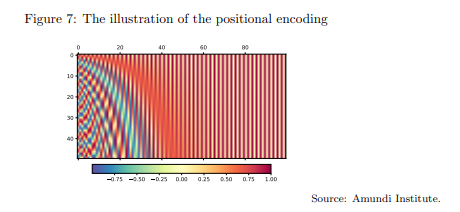


В машинном обучении прямая обработка текстовых данных часто затруднена, что требует применения подходящих методов для преобразования текста в числовые данные. Это привело к концепции вложений слов (word embeddings), которые математически переводят высокоразмерные векторы слов в более низкоразмерное пространство для упрощения обработки и извлечения признаков. Техники вложений являются ключевым фактором успеха многих приложений в глубоком обучении, таких как:

- В компьютерном зрении свёрточные нейронные сети (CNN) используют ядра для создания вложений изображений и извлечения признаков, таких как текстура и края из сырых изображений.

- Word2Vec (Mikolov et al., 2013) - популярная техника представления слов в обработке естественного языка, позволяющая словам схожего значения иметь схожее векторное представление.

- В графовых нейронных сетях для обработки графовых данных используются техники вложений узлов, такие как DeepWalk (Perozzi et al., 2014), Node2Vec (Grover and Leskovec, 2016), и техники вложений графов, такие как Graph2vec (Narayanan et al., 2017).

Хотя техники вложений широко используются в глубоком обучении, их применение к временным рядам представляет особые трудности из-за требований к выравниванию для измерения схожести. Одной из часто используемых техник является модель Time2Vec (Kazemi et al., 2019), представляющая временной ряд $ \tau $ вектором размера $ k + 1 $:

$$ t2v(\tau)[i] = \begin{cases}
\omega_i \tau + \phi_i & \text{если } i = 0 \\
F(\omega_i \tau + \phi_i) & \text{если } 1 \leq i \leq k
\end{cases} $$

Здесь $ t2v(\tau)[i] $ - это $ i $-й элемент вектора Time2Vec, $ F $ - периодическая активационная функция, а $ \omega_i $ и $ \phi_i $ - обучаемые параметры. Эта техника также может служить в качестве обучаемого позиционного кодирования в модели Transformer при работе с временными рядами.

Давайте рассмотрим конкретный числовой пример позиционного кодирования с использованием синусоидальной и косинусоидальной функций, как предложено в работе Vaswani et al. (2017).

Предположим, у нас есть последовательность слов длиной $ n = 4 $ и размерностью вложений $ d_{\text{model}} = 512 $. Для каждого элемента последовательности мы будем создавать позиционное кодирование.

1. **Формула позиционного кодирования:**

   $$ PE_{(pos, 2i)} = \sin \left( \frac{pos}{10000^{2i / 512}} \right) $$
   $$ PE_{(pos, 2i+1)} = \cos \left( \frac{pos}{10000^{2i / 512}} \right) $$

   где $ pos $ - позиция элемента в последовательности, $ i $ - индекс размерности в векторе позиционного кодирования, $ d_{\text{model}} = 512 $.

2. **Пример расчёта для элемента на позиции $ pos = 3 $:**

   Пусть $ i = 1 $ (первая размерность):
   
   $$ PE_{(3, 2 \cdot 1)} = \sin \left( \frac{3}{10000^{2 \cdot \frac{1}{512}}} \right) = \sin \left( \frac{3}{10000^{0.00390625}} \right) $$

   Вычислим значение $ 10000^{0.00390625} $:

   $$ 10000^{0.00390625} \approx 1.0184 $$

   Тогда:

   $$ PE_{(3, 2)} = \sin \left( \frac{3}{1.0184} \right) $$

   $$ PE_{(3, 2)} = \sin(2.947) $$

   $$ PE_{(3, 2)} \approx 0.1378 $$

   Теперь для косинусной компоненты $ PE_{(3, 2 \cdot 1 + 1)} $:

   $$ PE_{(3, 3)} = \cos \left( \frac{3}{10000^{0.00390625}} \right) $$

   $$ PE_{(3, 3)} = \cos(2.947) $$

   $$ PE_{(3, 3)} \approx -0.9905 $$

Таким образом, для элемента на позиции 3 мы получаем позиционное кодирование $ PE $:

$$ PE_{(3)} = [0.1378, -0.9905, ..., ...] $$

где остальные компоненты $ PE $ также вычисляются по аналогичным формулам для $ i = 2, 3, ..., 256 $.

Это пример расчёта позиционного кодирования с использованием синусоидальной и косинусоидальной функций для вложений слов в модели Transformer.


### 3.2.  Архитектура модели

Как было объяснено Васвани и соавт. (2017), архитектура Transformer модели основывается на рекурсивной структуре энкодера-декодера с механизмами мульти-головного внимания и использует метод обучения с учителем. Эта модель фактически является параллельной версией рекурсивного энкодера-декодера, изображенной на рисунке 4b. Следовательно, энкодеру и декодеру необходимы определенные входные данные, как показано на рисунке 9. Например, в задаче машинного перевода во время обучения на вход энкодера подается полное предложение на английском языке, а на вход декодера - соответствующее предложение на французском языке, сдвинутое вправо. Декодер генерирует следующее слово для французского предложения, как показано на рисунке 8.


**Рисунок 8**: Иллюстрация входных и выходных данных модели Transformer

| Входы энкодера                 | Входы декодера                   | Выходы декодера       |
|--------------------------------|----------------------------------|-----------------------|
| The coffee is free here         | Le                               | café                  |
| The coffee is free here Le      | café                             | est                   |
| The coffee is free here Le café | est                              | gratuit               |
| The coffee is free here Le café est | gratuit                         | ici                   |
| The coffee is free here Le café est gratuit | ici                        | <end>                 |

*Источник: Институт Amundi.*




### 3.2.1 Энкодер

Задача энкодера - отобразить входную последовательность в непрерывное представление, называемое "контекстным" вектором. В модели Transformer энкодер состоит из стопки из N идентичных энкодерных блоков, последовательно соединенных (серийное соединение). Параметр N определяет глубину сети: большее значение N соответствует более сложной модели с большим количеством параметров для обучения. Каждый энкодерный блок, изображенный слева на рисунке 9, состоит из двух основных компонент:

1. **Мульти-головной слой самовнимания:** Этот слой, подробно описанный в разделе 3.1.3, оценивает важность каждого элемента относительно всех остальных элементов в последовательности.

2. **Полносвязная сеть с двумя слоями прямого распространения:** Эта сеть состоит из двух слоев, где первый слой использует функцию активации ReLU (Rectified Linear Unit), а второй - линейную функцию активации:
   $$
   \text{FFN}(x) = \text{ReLU}(W_1x + b_1)W_2 + b_2
   $$
   Здесь $ W_1, b_1 $ - параметры первого слоя, а $ W_2, b_2 $ - параметры второго слоя.

Кроме указанных компонент, также применяются остаточные соединения и нормализация слоев. Остаточные соединения помогают решить проблему затухания градиента в глубоких сетях (подробное объяснение приведено в приложении B.5), а нормализация слоев нормализует выходы скрытых слоев для предотвращения проблем с градиентом из-за высоких скоростей обучения (дополнительные технические детали можно найти в приложении B.4).

Для входа X в энкодерный блок вычисления выглядят следующим образом:
$$ \widetilde{X} = X + \text{PE} \quad (\text{позиционное кодирование}) $$
$$ \widetilde{X} = \text{LayerNorm}(\widetilde{X} + \text{Self-MultiHead}(\widetilde{X})) \quad (\text{мульти-головное самовнимание}) $$
$$ \widetilde{X} = \text{LayerNorm}(\widetilde{X} + \text{FFN}(\widetilde{X})) \quad (\text{полносвязная сеть прямого распространения}) $$


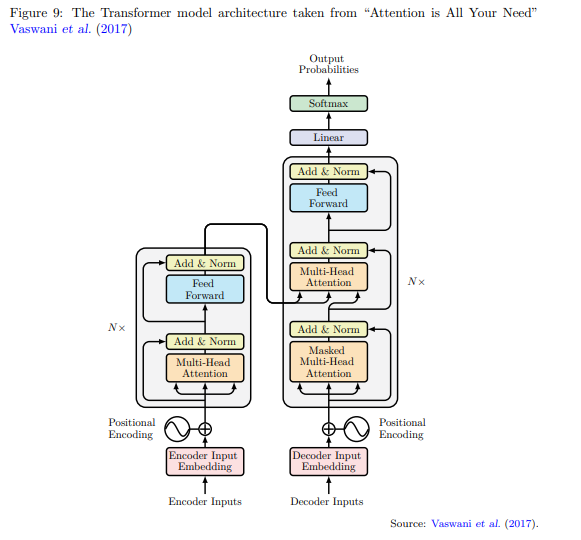


Эта исправленная версия включает в себя правки и дополнения для повышения ясности и технической точности. Исправления направлены на улучшение структуры и соответствия с указанными в работе Васвани и соавт. рисунками и разделами.


Давайте рассмотрим конкретный числовой пример для лучшего понимания того, как работает механизм мульти-головного внимания в модели Transformer.

Предположим, у нас есть последовательность входных векторов $ X = [x_1, x_2, x_3] $, где каждый $ x_i $ представляет собой вектор признаков определенной позиции во входной последовательности.

### 1. Мульти-головное внимание

Предположим, что у нас есть 3 головы в мульти-головном внимании, и мы используем векторное представление для вычисления весов внимания $ Q = XW_Q, K = XW_K, V = XW_V $, где $ W_Q, W_K, W_V $ - матрицы весов для запросов, ключей и значений.

#### Пример:

Пусть входная последовательность $ X $ выглядит следующим образом:

$$ X = \begin{bmatrix}
1 & 0 & 1 \\
2 & 1 & 0 \\
0 & 2 & 2
\end{bmatrix} $$

Это означает, что у нас есть три вектора признаков, каждый из трехмерного пространства.

#### Шаги выполнения мульти-головного внимания:

1. **Вычисление запросов $ Q $, ключей $ K $ и значений $ V $**:

   Пусть матрицы весов $ W_Q, W_K, W_V $ будут следующими:
   
   $$ W_Q = \begin{bmatrix}
   1 & 0 \\
   0 & 1 \\
   1 & 1
   \end{bmatrix}, \quad
   W_K = \begin{bmatrix}
   1 & 1 \\
   0 & 1 \\
   1 & 0
   \end{bmatrix}, \quad
   W_V = \begin{bmatrix}
   0 & 1 \\
   1 & 1 \\
   1 & 0
   \end{bmatrix} $$
   
   Тогда вычисляем $ Q, K, V $:
   
   $$ Q = XW_Q = \begin{bmatrix}
   1 & 0 & 1 \\
   2 & 1 & 0 \\
   0 & 2 & 2
   \end{bmatrix}
   \begin{bmatrix}
   1 & 0 \\
   0 & 1 \\
   1 & 1
   \end{bmatrix}
   =
   \begin{bmatrix}
   2 & 1 \\
   3 & 2 \\
   4 & 4
   \end{bmatrix} $$
   
   $$ K = XW_K = \begin{bmatrix}
   1 & 0 & 1 \\
   2 & 1 & 0 \\
   0 & 2 & 2
   \end{bmatrix}
   \begin{bmatrix}
   1 & 1 \\
   0 & 1 \\
   1 & 0
   \end{bmatrix}
   =
   \begin{bmatrix}
   2 & 1 \\
   2 & 1 \\
   4 & 2
   \end{bmatrix} $$
   
   $$ V = XW_V = \begin{bmatrix}
   1 & 0 & 1 \\
   2 & 1 & 0 \\
   0 & 2 & 2
   \end{bmatrix}
   \begin{bmatrix}
   0 & 1 \\
   1 & 1 \\
   1 & 0
   \end{bmatrix}
   =
   \begin{bmatrix}
   1 & 1 \\
   2 & 2 \\
   4 & 2
   \end{bmatrix} $$

2. **Вычисление весов внимания**:

   Вычисляем веса внимания $ \text{Attention}(Q, K, V) $. Для примера, предположим, что используем softmax для нормализации весов.

   Предположим, что после вычисления мы получили веса внимания:
   
   $$ \text{Attention}(Q, K, V) = \begin{bmatrix}
   0.5 & 0.2 \\
   0.3 & 0.4 \\
   0.7 & 0.1
   \end{bmatrix} $$

3. **Вычисление выхода мульти-головного внимания**:

   Финальный выход мульти-головного внимания вычисляется как взвешенная сумма значений $ V $, взвешенных весами внимания:
   
   $$ \text{Output} = \text{Attention}(Q, K, V) \cdot V $$
   
   Подставим вычисленные значения:
   
   $$ \text{Output} = \begin{bmatrix}
   0.5 & 0.2 \\
   0.3 & 0.4 \\
   0.7 & 0.1
   \end{bmatrix}
   \begin{bmatrix}
   1 & 1 \\
   2 & 2 \\
   4 & 2
   \end{bmatrix}
   =
   \begin{bmatrix}
   0.5 \cdot (1 + 1) + 0.2 \cdot (1 + 1) \\
   0.3 \cdot (2 + 2) + 0.4 \cdot (2 + 2) \\
   0.7 \cdot (4 + 2) + 0.1 \cdot (4 + 2)
   \end{bmatrix}
   =
   \begin{bmatrix}
   1.4 & 0.8 \\
   2.0 & 1.6 \\
   4.6 & 0.6
   \end{bmatrix} $$

Этот пример демонстрирует, как мульти-головное внимание в модели Transformer вычисляет взвешенную сумму значений на основе весов внимания, которые определяются запросами и ключами.


### 3.2.2 Декодер

Как показано на правой стороне рисунка 9, декодер также состоит из стопки идентичных декодерных блоков, каждый из которых включает в себя 3 компоненты:

1. **Маскированный мульти-головной слой самовнимания**

   Этот слой аналогичен слою в энкодере и используется для захвата взаимосвязей между элементами входной последовательности декодера. В механизме мульти-головного внимания все входные данные подаются одновременно, и линейные преобразования выполняются в каждой голове для захвата связей между данными по разным критериям. Важно обеспечить, чтобы декодер предсказывал элементы последовательности поочередно, основываясь на уже сгенерированных элементах. Для предотвращения использования информации о будущих элементах в процессе обучения, входной последовательности для декодера добавляется маска заглушки, как показано на рисунке 10b. Этот процесс называется маскированным прямым просмотром.

2. **Мульти-головной слой внимания**

   Этот компонент отличается от мульти-головного слоя самовнимания в энкодере и маскированного мульти-головного слоя самовнимания в декодере. В этом слое внимания запрос $ Q $, ключ $ K $ и значение $ V $ берутся из разных источников: запрос $ Q $ берется из предыдущего компонента в блоке декодера, а ключ $ K $ и значение $ V $ - это вывод энкодера $ X $. Этот механизм отвечает за поиск связей между входом энкодера и входом декодера.

3. **Полносвязная сеть прямого распространения из двух слоев**

   Этот компонент идентичен тому, что реализован в блоке энкодера.

Как и в энкодере, для каждого компонента в блоке декодера применяются остаточные соединения и слой нормализации. Для входа $ \hat{Y} $ в блок декодера вычисления выглядят следующим образом:

$$ \hat{Y} = Y + \text{PE} $$

$$ \hat{Y} = \text{LayerNorm}(\hat{Y} + \text{Masked Self-MultiHead}(\hat{Y})) $$

$$ \hat{Y} = \text{LayerNorm}(\hat{Y} + \text{MultiHead}(Q, K, V)) $$

$$ \hat{Y} = \text{LayerNorm}(\hat{Y} + \text{FFN}(\hat{Y})) $$

где $ X $ является выводом энкодера, как описано в разделе 3.2.1.





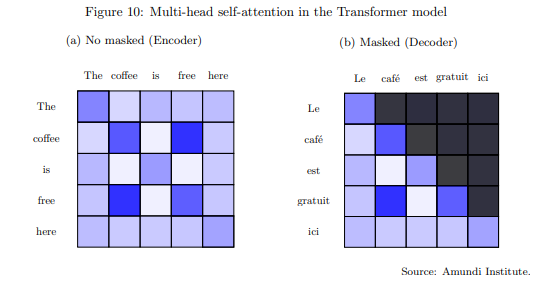




Этот обзор блока декодера подчеркивает его ключевые компоненты и их взаимодействие в контексте модели Transformer, обеспечивая последовательную генерацию выходной последовательности на основе контекста, полученного от энкодера.



### Числовой пример мульти-головного слоя внимания (Multi-Head Attention)

Предположим, у нас есть следующие данные для мульти-головного слоя внимания:

- Входные последовательности:
  - $ X = [3, 5, 7, 2] $
  - $ Q = [1, 4] $
  - $ K = [2, 3, 6, 8] $
  - $ V = [0.2, 0.5, 0.8, 0.3] $

Для простоты предположим, что у нас только одна голова внимания с единичными весами (без параметров $ W^Q, W^K, W^V $). Тогда вычисления для этой головы будут следующими:

1. **Вычисление весов внимания:**
   $$
   \text{Attention} = \text{softmax} \left( \frac{Q \cdot (K^T) }{\sqrt{d_k}} \right)
   $$

   Где $ d_k $ - размерность ключей $ K $.

   Для нашего примера:
   $$
   Q \cdot K^T = [1 \cdot 2 + 4 \cdot 3] = [2 + 12] = [14]
   $$
   $$
   \text{Attention} = \text{softmax} \left( \frac{[14]}{\sqrt{4}} \right) = \text{softmax}([3.5]) = [0.9706]
   $$

2. **Применение весов внимания к значениям $ V $:**
   $$
   \text{Output} = \text{Attention} \cdot V = [0.9706] \cdot [0.2, 0.5, 0.8, 0.3] = [0.1941, 0.4853, 0.7765, 0.2912]
   $$

### Числовой пример работы декодера в модели Transformer

Предположим, что у нас есть следующие данные для декодера:

- Предыдущее предсказание декодера $ \hat{Y} = [0.5, 0.2, 0.8] $
- Вывод энкодера $ X = [3, 5, 7, 2] $
- Запрос $ Q = [0.3, 0.6] $, ключ $ K = [0.4, 0.1, 0.9, 0.7] $, значение $ V = [0.1, 0.4, 0.6, 0.2] $

Для простоты, давайте рассмотрим только один блок декодера без остаточного соединения и нормализации:

1. **Маскированный мульти-головной слой самовнимания:**
   $$
   \text{Attention} = \text{softmax} \left( \frac{\hat{Y} \cdot (\hat{Y}^T) }{\sqrt{d_k}} \right)
   $$

   Пусть $ \sqrt{d_k} = 2 $ для простоты вычислений.
   $$
   \hat{Y} \cdot (\hat{Y}^T) = [0.5, 0.2, 0.8] \cdot [0.5, 0.2, 0.8]^T = [0.25 + 0.04 + 0.64] = [0.93]
   $$
   $$
   \text{Attention} = \text{softmax} \left( \frac{[0.93]}{2} \right) = \text{softmax}([0.465]) = [0.6176]
   $$

2. **Мульти-головной слой внимания:**
   $$
   \text{Attention} = \text{softmax} \left( \frac{Q \cdot (K^T) }{\sqrt{d_k}} \right)
   $$

   Вычислим $ Q \cdot K^T $:
   $$
   Q \cdot K^T = [0.3 \cdot 0.4 + 0.6 \cdot 0.1] = [0.12 + 0.06] = [0.18]
   $$
   $$
   \text{Attention} = \text{softmax} \left( \frac{[0.18]}{2} \right) = \text{softmax}([0.09]) = [0.5488]
   $$

3. **Полносвязная сеть прямого распространения (FFN):**
   Пусть веса для слоев полносвязной сети будут:
   - $ W_1 = \begin{bmatrix} 0.2 & 0.3 & 0.1 \\ 0.4 & 0.7 & 0.5 \end{bmatrix} $
   - $ W_2 = \begin{bmatrix} 0.5 \\ 0.2 \\ 0.8 \end{bmatrix} $
   - $ b_1 = \begin{bmatrix} 0.1 \\ 0.2 \\ 0.3 \end{bmatrix} $
   - $ b_2 = 0.5 $

   Вычислим выход FFN:
$$
   \text{FFN}(\hat{Y}) = \text{ReLU}(W_1 \cdot \hat{Y} + b_1) \cdot W_2 + b_2
   $$

   Для $ \hat{Y} = [0.5, 0.2, 0.8] $:
$$
   W_1 \cdot \hat{Y} + b_1 = \begin{bmatrix} 0.2 & 0.3 & 0.1 \\ 0.4 & 0.7 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0.5 \\ 0.2 \\ 0.8 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \\ 0.3 \end{bmatrix} = \begin{bmatrix} 0.66 \\ 1.09 \end{bmatrix}
   $$
$$
   \text{ReLU}(\begin{bmatrix} 0.66 \\ 1.09 \end{bmatrix}) = \begin{bmatrix} 0.66 \\ 1.09 \end{bmatrix}
   $$
$$
   \text{FFN}(\hat{Y}) = \begin{bmatrix} 0.66 & 1.09 \end{bmatrix} \cdot \begin{bmatrix} 0.5 \\ 0.2 \\ 0.8 \end{bmatrix} + 0.5 = [1.066] + 0.5 = [1.566]
   $$

Эти числовые примеры демонстрируют конкретные вычисления для мульти-головного слоя внимания и блока декодера в модели Transformer, используя заданные входные данные и вычислительные шаги.



### 3.3. Преимущества моделей Transformer

В общем, модели Transformer используют архитектуру seq2seq, что предоставляет значительную гибкость для решения сложных задач обучения на последовательностях. За счет механизма внимания мы можем эффективно улавливать долгосрочные зависимости между элементами последовательности, особенно благодаря механизму мульти-головного внимания, который позволяет учитывать информацию из различных аспектов последовательности.

Кроме того, помимо само-внимательных механизмов, применяемых в энкодере и декодере, Transformer использует кросс-внимание для улавливания взаимосвязей между выходами энкодера и декодера. Благодаря своей само-внимательной природе, модель Transformer обрабатывает входные данные глобально, а не последовательно, что снижает вероятность проблем с затухающими или взрывающимися градиентами.

Использование техники учителя в процессе обучения также помогает избежать накопления ошибок при многошаговых прогнозах или задачах генерации последовательностей. Кроме того, одним из основных преимуществ моделей Transformer является возможность параллельной обработки. Каждая голова внимания в модели Transformer может независимо оценивать отношения между элементами входных данных по различным аспектам благодаря механизму мульти-головного внимания.

В сравнении с традиционными рекуррентными нейронными сетями, где необходимо подавать элементы последовательности поочередно, модели Transformer значительно улучшают параллельную обработку данных и эффективность вычислений.

В заключение, модели Transformer представляют значительный прорыв в моделировании последовательностей, обеспечивая высокую производительность, масштабируемость и эффективность по сравнению с традиционными архитектурами на основе рекуррентных сетей.



### 3.4. Применение моделей Transformer в прогнозировании временных рядов

Изучая принцип внимательности и архитектуру seq2seq моделей Transformer, мы видим, что они очень подходят для задач генерации последовательностей, где требуется преобразовать последовательности из одной области в последовательности другой. Аналогично, эти передовые методы машинного обучения можно успешно применять в прогнозировании временных рядов, особенно в многопериодном многомерном прогнозировании временных рядов, как показано на Рисунке 11. В таких задачах необходимо учитывать не только временные зависимости во временных рядах для моделирования динамического развития систем, но и пространственные зависимости в многомерных данных для понимания их взаимодействия. В финансовой сфере прогнозирование временных рядов играет важную роль в анализе экономики и принятии бизнес-решений. Поэтому мы рассмотрим два финансовых применения моделей Transformer:


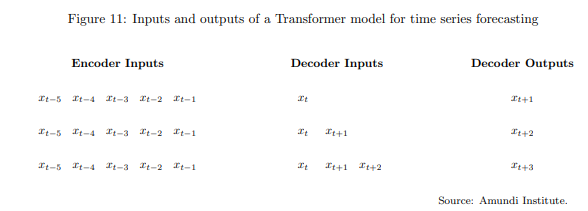


- **Использование только энкодера для одношагового прогнозирования**

Как показано на Рисунке 12, если использовать только часть энкодера модели Transformer и соединить его выход непосредственно с конечным слоем, модель будет напоминать традиционную многие-к-одному архитектуру RNN, но с использованием механизма самовнимания. Таким образом, эту модель можно использовать для решения задач одношагового прогнозирования, как это часто делается с рекурсивными моделями, такими как RNN или LSTM. Однако модели Transformer позволяют достичь более гибкой параллелизации, эффективного сохранения долговременной памяти и уменьшения проблем с затухающими или взрывающимися градиентами. Также можно изменять функцию активации в последнем слое модели для решения различных задач, например, задач классификации (предсказание знака доходности следующей недели) или задач регрессии (одношаговое прогнозирование временного ряда).


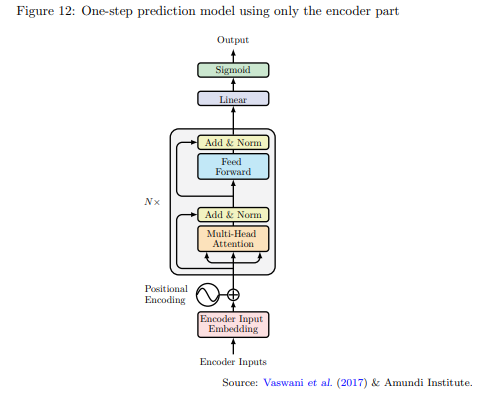


- **Использование полной модели Transformer для многопериодного прогнозирования**

Как объяснено в разделе 2.2, модель одношагового прогнозирования затруднительно применять для задач многопериодного прогнозирования, как в случае итеративного подхода, показанного на Рисунке 1, так и в случае прямого подхода, показанного на Рисунке 2. Благодаря архитектуре seq2seq в моделях Transformer, можно эффективно решать задачи многопериодного прогнозирования.

В разделе 5 мы проведем тестирование моделей Transformer в двух различных сценариях: стратегиях последовательного следования трендов и задачах многопериодной оптимизации портфеля.

Для стратегии последовательного следования трендов мы будем использовать только часть энкодера модели Transformer для предсказания знака доходности актива на следующей неделе, используя короткие, средние и долгосрочные тренды. В нашем случае мы не будем обучать сложную модель, а будем использовать концепцию слабых учеников в ансамблевом обучении: обучим много моделей, каждая из которых будет простой и будет использовать только одну или две характеристики. В конечном итоге мы объединим эти слабые модели для получения сильного ученика. В разделе 4.1 мы объясним, почему мы так поступаем.

Для задачи многопериодной оптимизации портфеля мы будем использовать полную модель Transformer для многопериодного прогнозирования временных рядов волатильности, а эти прогнозы будут использоваться в методах распределения портфеля, таких как метод оптимизации средней дисперсии и метод бюджетирования рисков. Мы сравним различия между оптимальными портфелями за один период, многопериодными оптимальными портфелями на основе исторических оценок и многопериодными оптимальными портфелями на основе прогнозов модели Transformer.




## 4. Количественные инвестиции и машинное обучение**

Вследствие значительного роста вычислительной мощности машинные обучающиеся модели находят все большее применение в финансовом секторе, что способствует более глубокому пониманию финансовых рынков. В области построения инвестиционных портфелей одной из самых сложных и важных задач является прогнозирование будущих доходностей. Машинное обучение предоставляет вычислительные преимущества, такие как способность улавливать нелинейные взаимосвязи и временные зависимости. Например, Cherief и др. (2022) использовали алгоритмы машинного обучения на основе деревьев для выявления нелинейностей и взаимодействий между факторами риска на рынках кредитов в EUR и USD. Однако успешное применение моделей машинного обучения зависит от выполнения нескольких условий: чистоты данных, достаточного объема данных, устойчивости обнаруженных в данных паттернов, подходящей сложности модели и высокого качества обучения. Часто в практической работе трудно удовлетворить все эти условия из-за особенностей финансовых временных рядов, которые отличаются от данных в других областях, таких как тексты или изображения. Поэтому применение машинного обучения в количественных инвестициях представляет собой сложную инженерную задачу, требующую внимательного подхода на каждом этапе процесса.

###**4.1. Проблемы применения машинного обучения в финансах**

Модели машинного обучения иногда рассматриваются как "черные ящики", которые дают результат без объяснения, как они это сделали, особенно это характерно для глубокого обучения с нейронными сетями. Кроме того, в финансовой сфере можно выделить как минимум три другие препятствия, описанные в работе Israel и др. (2020):

1. **Низкое отношение сигнал-шум:** Финансовые данные обычно имеют низкое отношение сигнал-шум по сравнению с традиционными областями применения машинного обучения, такими как обработка изображений или обработка естественного языка. Присутствие значительного шума делает систему менее предсказуемой. В задачах классификации или регрессии шум влияет не только на признаки, но и на метки. Например, доходность актива может включать ожидаемую доходность и шум; различить их сложно, особенно если шум сильный.

2. **Смена режима рынка:** Финансовые рынки динамичны и характеризуются изменениями режимов (например, экономические циклы как экспансия или рецессия, и рыночные циклы как бычий или медвежий рынки). Для обучения устойчивой модели машинного обучения необходимо, чтобы обучающие и валидационные данные имели схожее распределение. Учитывая последовательный характер финансовых данных, поддержание такой согласованности затруднительно. Модели, обученные на устаревших данных, могут плохо адаптироваться к текущим режимам рынка.

3. **Нехватка данных:** В отличие от других отраслей, в финансовом секторе часто отсутствуют большие данные. Финансовые данные стохастичны, нестационарны и ограничены по объему. Создание новых данных через эксперименты для отслеживания временной динамики затруднительно. Ограничения размера данных касаются не только признаков, но и меток. Например, если у нас есть 20 лет ежедневных доходностей по финансовому активу, это дает около 5000 точек данных, распределенных по разным режимам рынка. Экстремальные события, такие как финансовые кризисы или пандемии, дополнительно снижают доступность данных. Ограниченное количество данных создает вызовы для обучения моделей глубокого обучения, особенно в многомерных сценариях.

Помимо перечисленных причин, объем данных, используемых для обучения модели, часто ограничен указанными препятствиями.


##**4.2. Баланс между сложностью модели, качеством калибровки и качеством прогнозирования**

При использовании техник машинного обучения в количественных инвестициях, особенно при прогнозировании направления или значения доходности активов, часто мы подаем все признаки в сложную модель глубокого обучения, надеясь уловить нелинейные взаимосвязи и сложные структуры в финансовых данных. Однако на основе трех проблем использования машинного обучения в финансовых приложениях, о которых мы упоминали ранее, легко допустить две ошибки:

Поскольку качество и количество данных в финансовой сфере не настолько высоки, как во многих других областях, где используются техники машинного обучения, точность моделей окажется недостаточной для определения, является ли модель хорошей и устойчивой. Особенно метки, которые мы используем для машинного обучения, такие как положительные и отрицательные знаки доходности активов, очень изменчивы, шумны и иногда неверны. Поэтому использование этих меток низкого качества и сложных моделей приведет к тому, что модели ничему не научатся или переобучатся.

По нашему опыту, мы обнаружили, что использование сложных моделей глубокого обучения без достаточного объема данных для обучения имеет тенденцию уделять больше внимания определенным признакам, что приводит к переобучению. В этом случае возникает проблема потери диверсификации, что является одним из ключевых аспектов в количественных инвестициях.

Таким образом, в случаях, когда мы не можем значительно улучшить точность модели, внепробной показатель производительности при использовании сложных моделей глубокого обучения с большим количеством признаков часто оказывается ниже, чем у традиционных правил, потому что мы также упускаем возможность использовать диверсификацию, пытаясь уловить более сложные взаимосвязи в данных. Поэтому мы считаем, что следует выбирать баланс между сложностью модели и диверсификацией. Вдохновленные концепцией слабых учащихся в ансамблевом обучении, мы предпочитаем практически обучать множество слабых моделей с простыми структурами, используя меньше признаков. Затем мы строим сильную модель, взвешивая предсказания всех моделей, вместо того чтобы обучать сложную модель машинного обучения. Также мы выбираем различные виды слабых моделей, ожидая получить полезную информацию с разных аспектов. При обучении каждого вида слабой модели мы стараемся использовать как можно меньше параметров/гиперпараметров, чтобы избежать переобучения, при этом используем различные наборы гиперпараметров для получения более надежных результатов. Еще одно преимущество использования меньшего количества признаков для обучения модели заключается в том, что модель может быть хорошо обучена сравнительно меньшим объемом данных, даже с использованием структур нейронных сетей. Таким образом, наша стратегия остается разнообразной и более надежной. Мы считаем это очень важным аспектом при применении машинного обучения в финансах, особенно для количественных инвестиций.

Этот подход, помимо соблюдения принципа диверсификации, соответствует теории Вапник-Червоненкиса, которая стремится предоставить статистическое объяснение процесса обучения. Согласно Вапнику (2000), при обучении модели машинного обучения необходимо найти баланс между сложностью модели, качеством калибровки и качеством прогнозирования. В контексте глубокого обучения сложность модели относится к количеству параметров, используемых в модели, таких как количество слоев нейронной сети и количество узлов на слой. Больше параметров означает более сложные модели, которые могут учиться более сложным взаимосвязям в данных, но требуют большого объема данных для калибровки модели в процессе обучения. Качество калибровки измеряется в терминах ошибки обучения, и сложность модели и данные должны соответствовать друг другу для повышения качества калибровки. Например, слишком простая модель не может улавливать всю информацию в данных, а линейная модель не находит нелинейных взаимосвязей в обучающем наборе данных, в то время как слишком сложная модель требует большого объема высококачественных данных для обучения, что обычно невозможно. Качество прогнозирования связано с ошибкой модели на проверочных данных, и сложная модель часто подвержена переобучению, что может привести к большим ошибкам на проверочных данных.

Как объяснено в разделе 4.1, создание очень сложных моделей машинного обучения с данными из финансовой сферы крайне сложно из-за ошибок в данных, используемых для обучения моделей. Поэтому наша цель - пожертвовать сложностью модели для достижения лучшего качества калибровки и прогнозирования, что означает меньшие трудности в подгонке модели к финансовым данным и меньшие ошибки на проверочных данных. Мы считаем, что это очень подходящее решение для применения машинного обучения в количественных инвестициях, где качество и количество данных относительно ниже, чем в других отраслях, и мы не можем найти определенный закон, полностью описывающий действия на рынке. Уменьшение сложности модели будет компенсировано диверсификацией количественных инвестиций. Поэтому, когда мы хотим применить традиционную модель машинного обучения или модель глубокого обучения для прогнозирования будущей доходности актива, мы предпочитаем использовать модели с низкой сложностью, с простыми структурами и меньшим количеством признаков, например, модель Transformer, которая имеет небольшую глубину в ее кодировщике и декодировщике, и использует два или три признака для входных данных. В этом случае модели глубокого обучения все еще используются для того, чтобы воспользоваться их способностью обрабатывать временные ряды и захватывать долгосрочную память в данных, а не для того, чтобы использовать их способность к подгонке сложных нелинейных взаимосвязей с очень глубокими структурами.



In [1]:
# Install necessary packages
!pip install transformers torch huggingface-hub

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train-batch.pt:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/151k [00:00<?, ?B/s]

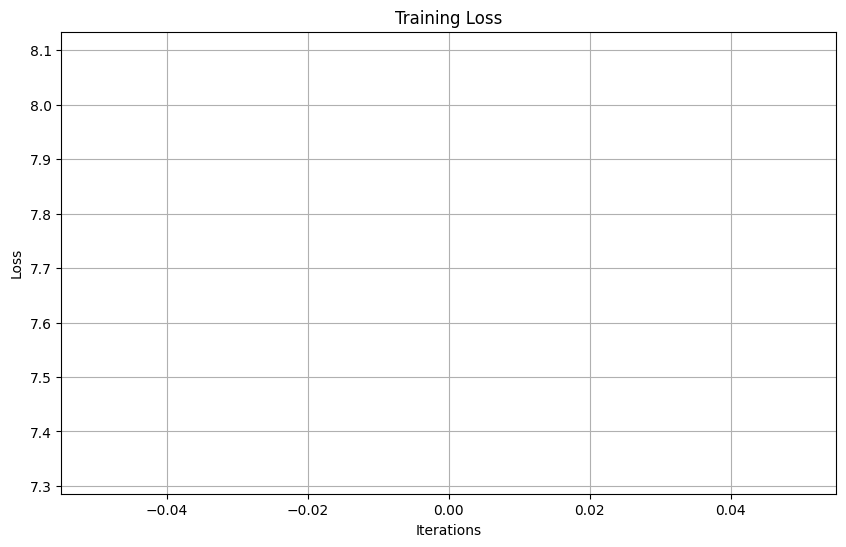

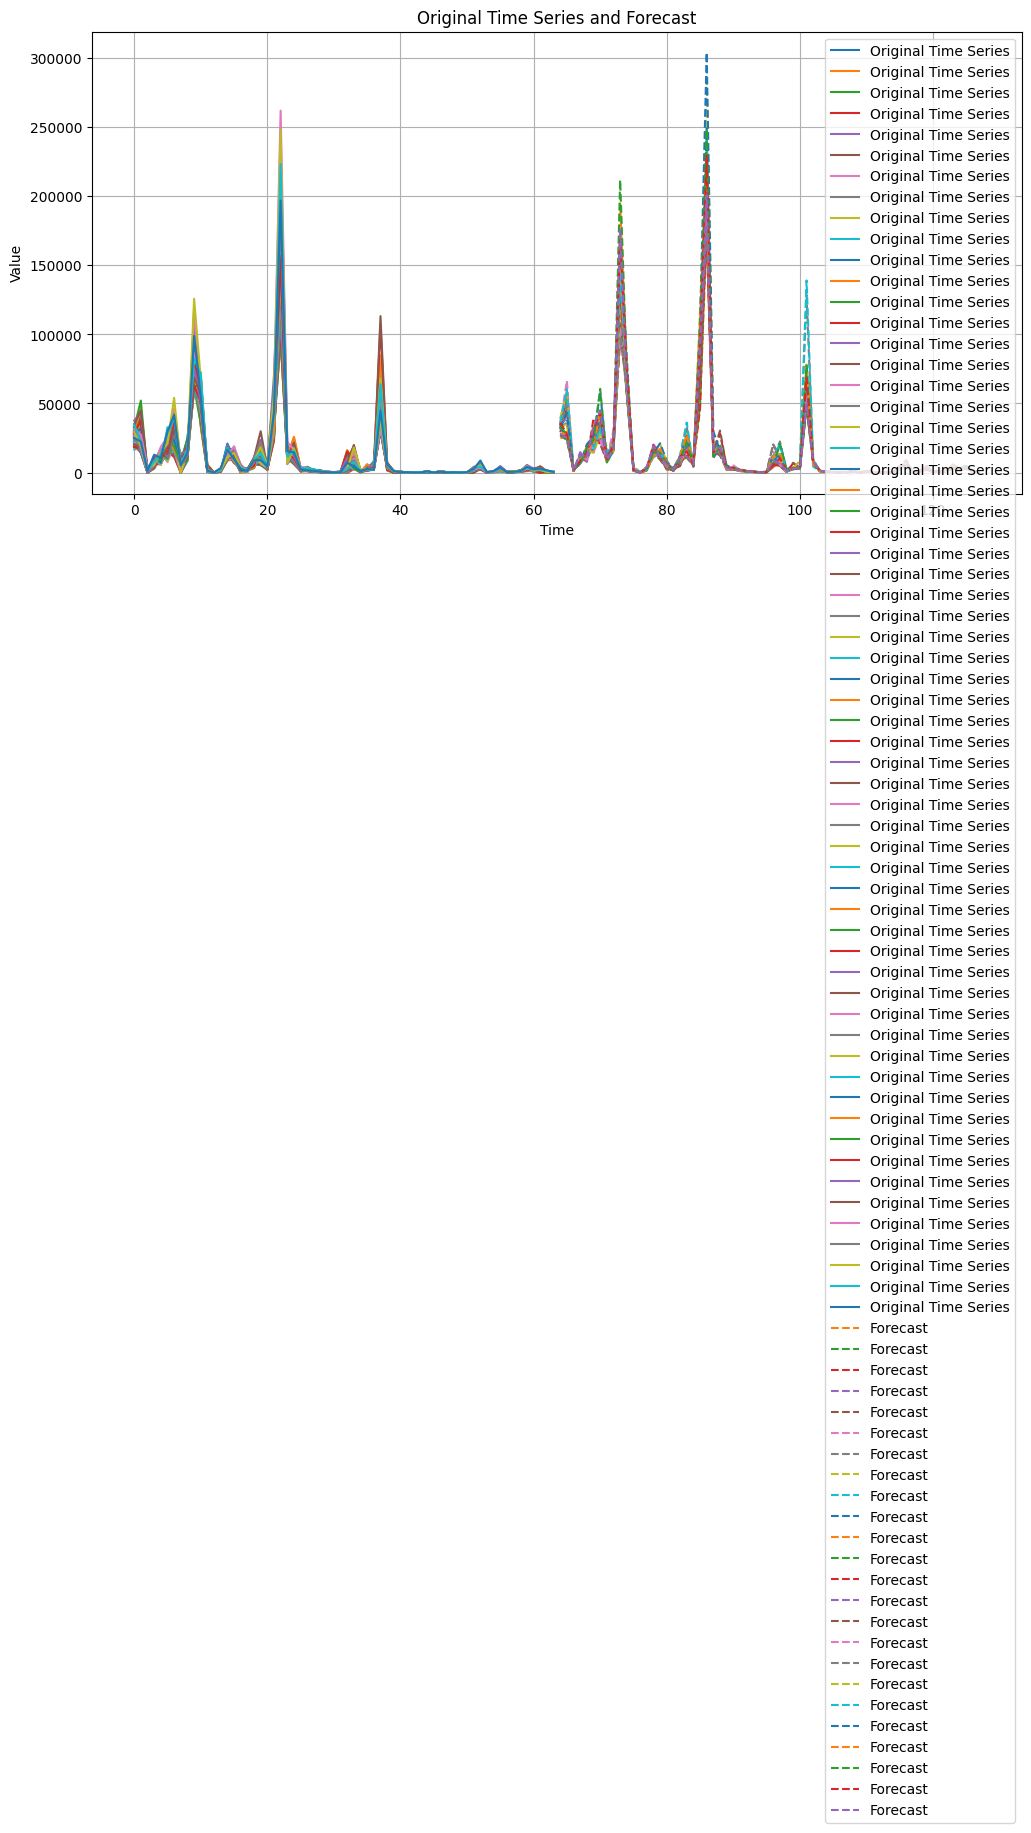

In [4]:
# Import required libraries
from huggingface_hub import hf_hub_download
import torch
from transformers import TimeSeriesTransformerForPrediction
import matplotlib.pyplot as plt

# Download the dataset from Hugging Face Hub
file = hf_hub_download(
    repo_id="hf-internal-testing/tourism-monthly-batch",
    filename="train-batch.pt",
    repo_type="dataset"
)

# Load the dataset
batch = torch.load(file)

# Load the model for time series prediction
model = TimeSeriesTransformerForPrediction.from_pretrained(
    "huggingface/time-series-transformer-tourism-monthly"
)

# During training, provide both past and future values
# as well as possible additional features
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
)

loss = outputs.loss
loss.backward()

# Visualize training loss
plt.figure(figsize=(10, 6))
plt.plot(outputs.loss.detach().numpy())
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()


# During inference, provide only past values
# as well as possible additional features
# the model autoregressively generates future values
outputs = model.generate(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_time_features=batch["future_time_features"],
)

# Calculate mean prediction across sequences
mean_prediction = outputs.sequences.mean(dim=1)

# Visualize the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(batch["past_values"], label='Original Time Series')
plt.plot(range(len(batch["past_values"]), len(batch["past_values"]) + len(mean_prediction)),
         mean_prediction, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Time Series and Forecast')
plt.legend()
plt.grid(True)
plt.show()